In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.lines import Line2D
from scipy.integrate import simps
from scipy.signal import detrend
import scipy.stats as st
from fitter import Fitter, get_common_distributions, get_distributions

# Sequential Simulation

In [2]:
salinity = pd.read_table('../../data/SalinitySST/Salinity_Contrast_IAP_data_record_SC2000.txt',skiprows=13,sep='\s+',header=None)
salinity.columns = ['date','SC','2sd','smoothed']
for i in range(732):
    salinity.iloc[i,0] = datetime.date(year=int(salinity.iloc[i,0]),month=i%12+1,day=1)

In [3]:
salinity

,date,SC,2sd,smoothed
0,1960-01-01,-0.01141,0.00597,-0.01204
1,1960-02-01,-0.01064,0.00599,-0.01206
2,1960-03-01,-0.01123,0.00605,-0.01208
3,1960-04-01,-0.01124,0.00602,-0.01209
4,1960-05-01,-0.01079,0.00598,-0.01211
...,...,...,...,...
727,2020-08-01,0.00015,0.00119,0.00176
728,2020-09-01,0.00020,0.00134,0.00178
729,2020-10-01,-0.00065,0.00134,0.00180
730,2020-11-01,-0.00125,0.00134,0.00181


In [4]:
sst = np.load('../../data/SalinitySST/ersst.v5.1960_2020_sst.npy')
ssta = np.load('../../data/SalinitySST/ersst.v5.1960_2020_ssta.npy')

In [5]:
ssta_mean = np.nanmean(np.nanmean(ssta,axis=0),axis=0)

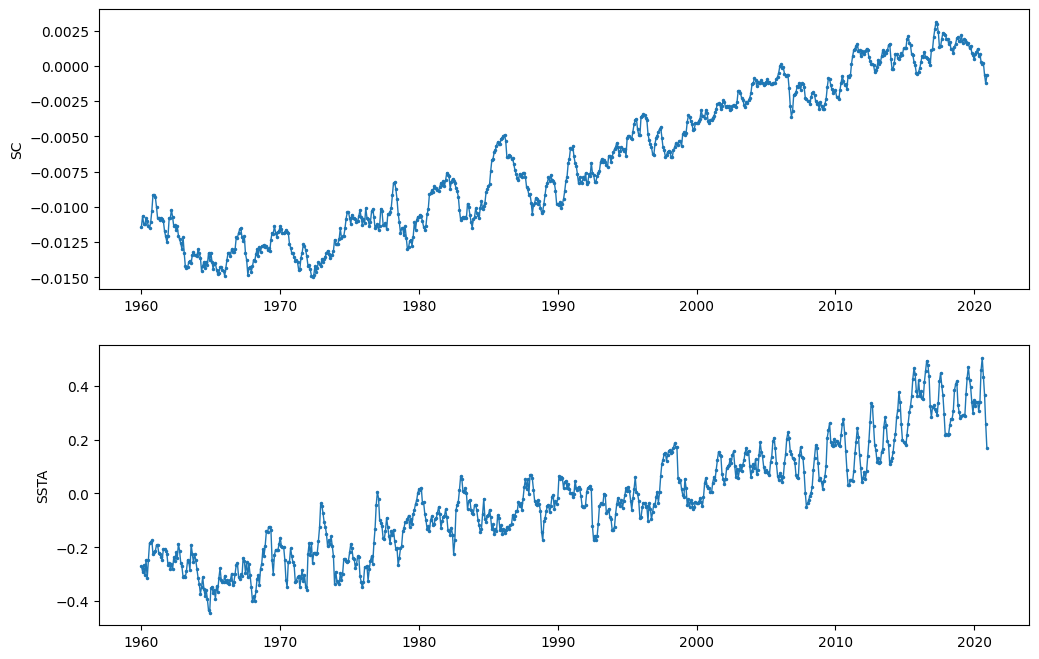

In [6]:
fig, ax = plt.subplots(2,1,figsize=[12,8])
ax[0].plot(salinity.date,salinity.SC,'.-',lw=1,markersize=3)
ax[0].set_ylabel('SC')
ax[1].plot(salinity.date,ssta_mean,'.-',lw=1,markersize=3)
ax[1].set_ylabel('SSTA')
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
rayleigh,9.249164e+05,-936.480176,2421.510419,inf,0.076403,5.713890e-02
norm,9.322997e+05,-926.477381,2423.895706,inf,0.070735,9.467098e-02
lognorm,9.526689e+05,-927.164291,2436.083403,inf,0.067399,1.251329e-01
gamma,9.589172e+05,-928.757775,2438.044615,inf,0.078866,4.532678e-02
powerlaw,1.118354e+06,-975.057483,2484.187037,inf,0.167051,8.716262e-08


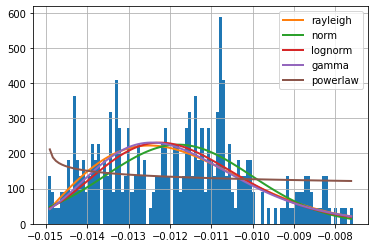

In [67]:
f = Fitter(salinity.SC[:300],distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,203242.043577,-848.885876,2676.615467,inf,0.081286,0.006249
uniform,222096.511847,-855.390092,2708.871673,inf,0.098319,0.000436
norm,225480.440433,-814.185787,2715.404114,inf,0.075591,0.013596
lognorm,225741.000266,-812.126901,2721.971460,inf,0.075803,0.013221
gamma,227733.017602,-812.247758,2725.766857,inf,0.080784,0.006707


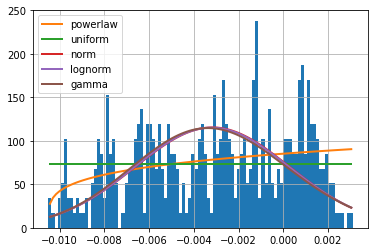

In [68]:
f = Fitter(salinity.SC[300:],distributions= get_common_distributions())
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,190254.575953,-739.418844,4083.358841,inf,0.056376,0.018329
gamma,209866.291670,-781.673880,4161.769365,inf,0.038582,0.220189
lognorm,238213.986347,-797.571373,4254.512850,inf,0.053644,0.028523
cauchy,287355.770261,-784.515565,4385.204909,inf,0.080675,0.000136
rayleigh,301344.157740,inf,4419.998280,inf,0.081229,0.000120


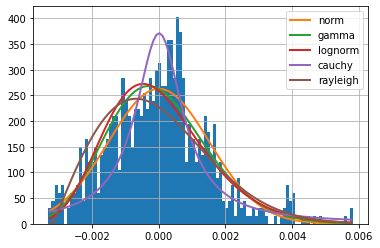

In [17]:
f = Fitter(SC_detrend,distributions= get_common_distributions())
f.fit()
f.summary()

(93.21027002083216, -0.7703582404647566, 0.008265428521694415)


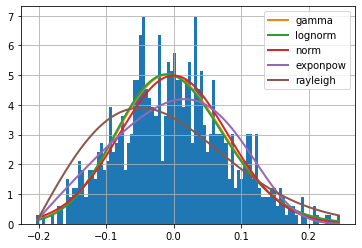

In [28]:
f = Fitter(SSTA_detrend,distributions= get_common_distributions())
f.fit()
f.summary()
print(f.fitted_param["gamma"])

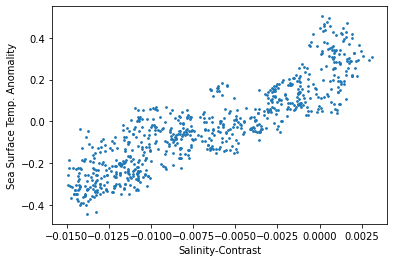

In [19]:
fig, ax = plt.subplots(1, figsize=[6,4])
ax.scatter(salinity.SC, ssta_mean,s=3)
ax.set_xlabel('Salinity-Contrast')
ax.set_ylabel('Sea Surface Temp. Anomality')
plt.show()

In [32]:
df = pd.DataFrame({'sc': salinity.SC,'ssta_mean': ssta_mean})
df.to_csv('../../data/SalinitySST/SalinitySST.csv',index=False)

In [69]:
st.norm.fit(salinity.SC)
dist1 = st.norm(-0.006702814207650273, 0.0051338947074439055)
np.sum(dist1.logpdf(salinity.SC))

2820.3609902057574

In [70]:
dist2 = st.norm(-0.011125706371191136, 0.002288312618403328)
dist3 = st.norm(-0.0023991374663072775, 0.0030580643790806086)
np.sum(dist2.logpdf(salinity.SC[:361])) + np.sum(dist3.logpdf(salinity.SC[361:])) 

3304.275570549139

In [53]:
np.var(salinity.SC[:361])

5.2363746395438955e-06

In [54]:
np.var(salinity.SC[361:])

9.351757746601667e-06

In [31]:
# base 20 years, update 10 years
df = pd.DataFrame({'sc': salinity.SC[:240],'ssta_mean': ssta_mean[:240]})
df.to_csv('../../data/SalinitySST/b20u10_0.csv',index=False)
df = pd.DataFrame({'sc': salinity.SC[240:240+120],'ssta_mean': ssta_mean[240:240+120]})
df.to_csv('../../data/SalinitySST/b20u10_0_test.csv',index=False)
for i in range(1,4):
    df = pd.DataFrame({'sc': salinity.SC[:240+120*i],'ssta_mean': ssta_mean[:240+120*i]})
    df.to_csv('../../data/SalinitySST/b20u10_{}.csv'.format(i),index=False)
    df = pd.DataFrame({'sc': salinity.SC[240+120*i:240+120*(i+1)],'ssta_mean': ssta_mean[240+120*i:240+120*(i+1)]})
    df.to_csv('../../data/SalinitySST/b20u10_{}_test.csv'.format(i),index=False)